# Regression

## 1. Introduction to Regression

setelah mempelajari klasifikasi sekarang kita akan mempelajari metode supervised learning lainnya yaitu regresi. perbedaan utama antara regresi dan klasifikasi adalah variable targetnya.
- klasifikasi > variable targetnya adalah data kategorik
- regresi > variable targetnya adalah data numerik


### 1.1 Prediksi Level Glucose

Untuk memahami regresi, maka kita menggunakan dataset untuk prediksi gula darah. 

In [111]:
# import library yang diperlukan
import pandas as pd

In [112]:
# baca dataframe
diabetes_df = pd.read_csv('dataset/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [113]:
# menentukan predktor (X) dan target (y)
X = diabetes_df.drop ('glucose', axis = 1).values # prediktor
y = diabetes_df['glucose'].values # target

print( type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


**insight:**
- diketahui bahwa variable X dan y merupakan array Numpy

#### 1. membuat prediksi dari sebuah kolom prediktor

In [114]:
# subset satu kolom prediktor, yaiut kolom bmi
X_bmi = X[:,4]

# cek bentuk subsetting
print(y.shape, X_bmi.shape)

(768,) (768,)


**insight:**
- keduanya adalah array satu dimensi
- pada data target yaitu `y` dimensi satu dimensi menunjukan bahwa data sudah sesuai bentuknya
- pada data prediktor yaitu `X_bmi` dimensi satu dimensi belum sesuai sesuai sehingga kita perlu format bentuk data menjadi 2D agar dapat diterima scikit learn

In [115]:
# Ubah format prediktor menjadi 2D supaya diterima scikit learn
X_bmi = X_bmi.reshape(-1,1)

# cek kembali
print(X_bmi.shape)

(768, 1)


#### 2. Plotting Glucose vs BMI

<function matplotlib.pyplot.show(close=None, block=None)>

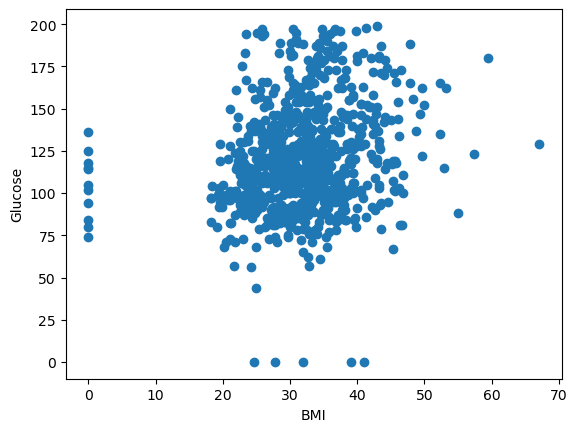

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(X_bmi, y)
plt.ylabel('Glucose')
plt.xlabel('BMI')
plt.show

**insight:** 
- meningkatnya BMI akan cenderung meningkatnya gula darah

#### 3. fitting model regression

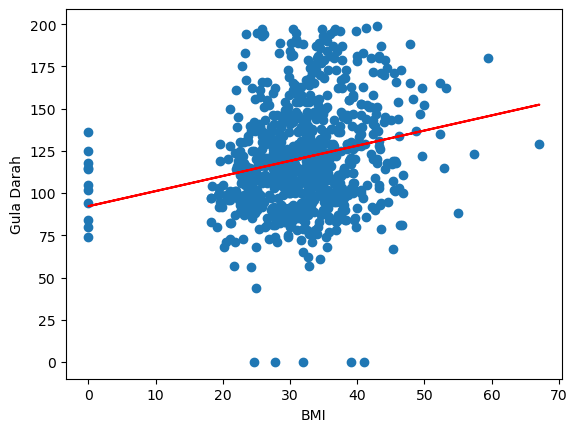

In [117]:
#tahapan untuk melakukan pelatihan model regresi

#1. import modul LinearRegression dari linear_model
from sklearn.linear_model import LinearRegression

#2. membuat instance variable reg = LinearRegression()
reg = LinearRegression()

#3. melakukan fitting model reg.fit(X_bmi, y)
reg.fit(X_bmi, y)

#4. membuat prediksi predictions = reg.predict(X_bmi)
predictions = reg.predict(X_bmi)

#5. buat visulisasi
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color = 'red')
plt.ylabel('Gula Darah')
plt.xlabel('BMI')
plt.show()

**insight:**
- garis merah diatas menunjukan korelasi diatas kurang kuat

### Exercise

**1. Creating features**

In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

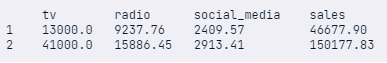

You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

- Create X, an array of the values from the sales_df DataFrame's "radio" column.
- Create y, an array of the values from the sales_df DataFrame's "sales" column.
- Reshape X into a two-dimensional NumPy array.
- Print the shape of X and y.

In [118]:
sales_df = pd.read_csv('dataset/advertising_and_sales_clean.csv')
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [119]:
import numpy as np

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


> See that there are 4546 values in both arrays? Now let's build a linear regression model!

**2. Building a linear regression model**

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

X and y have been preloaded for you as follows:

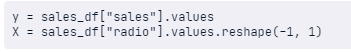

- Import LinearRegression.
- Instantiate a linear regression model.
- Predict sales values using X, storing as predictions.

In [120]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


> See how sales values for the first five predictions range from `$95,000`  to over `$290,000`. Let's visualize the model's fit.

**3. Visualizing a linear regression model**

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.

- Import matplotlib.pyplot as plt.
- Create a scatter plot visualizing y against X, with observations in blue.
- Draw a red line plot displaying the predictions against X.
- Display the plot.

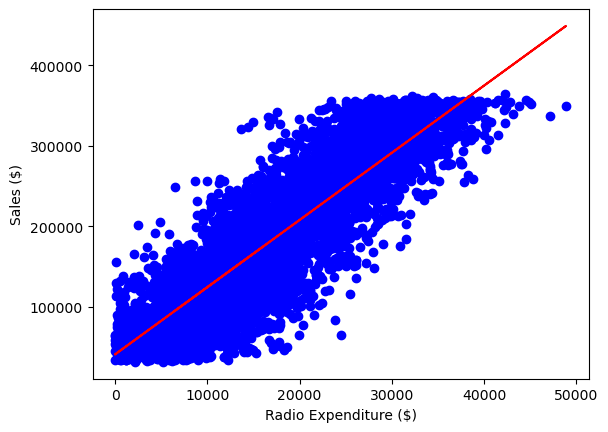

In [121]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

> The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales! Now let's take a look at what is going on under the hood to calculate this relationship.

## 2. Basic of Linear Regression

Bagaimana cara kerja dari regresi linear ? 

### 2.1 Regresi pada Satu Prediktor (Simple Linear Regression)
- Ketika kita ingin memasukan garis ke dalam data melalui persamaan garis lurus `y = ax + b`
    - simple linear regression/ols menggunakan satu buah kolom prediktor sebagai ols
        - y = target
        - x = prediktor tunggal 
        - a,b = parameter/koefisien dari model, intercept (koefisien model) dan slope (kemiringan)

- bagaimana menentukan nilai intercept a dan slope b ?
    - caranya dengan mendefinisikan fungsi kesalahan (error function) untuk setiap baris yang diberikan dan memilih garis yang memperkecil nilai tersebut. 
    - error function = loss function = cost function
    
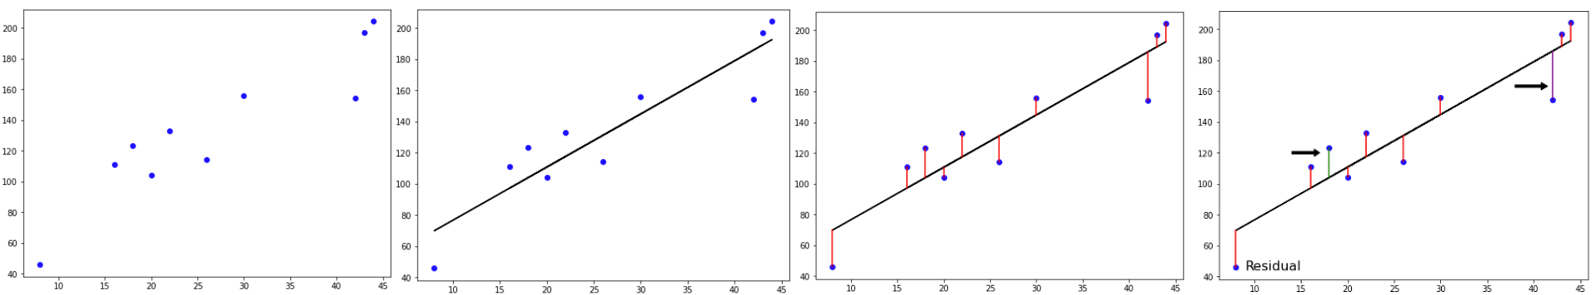

pada gambar diatas, mari kita visualisasikan loss function melalui scatter plot. 
- pada sebaran titik diatas, kita ingin garis lurus sedekat mungkin dengan titik pengamatan
- kita ingin meminimalkan jarak vertikal antara fit dengan data (jarak residual). 
- jadi untuk setiap data kita hitung jarak vertikal (residual) antara data dengan garis
- kita juga meminimalkan residual dengan menggunakan rumus RSS, dengan menambahkan semua sisa kuadrat dihitung jumlah sisa kuadratnya
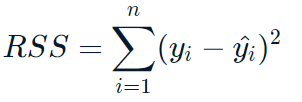

jadi regresi linear sederhana atau OLS adalah regresi dengan tujuan memninimalkan RSS



#### 2.2 Regresi pada Dua Prediktor 

- ketika prediktor terdapat dua dan memiliki satu target maka persamaan garis yang dihasilkan adalah 
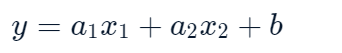

- untuk melatih regresi linear model lebih dari satu prediktor maka ada 3 variable yang diperlukan yaitu tentukan tiga variable a1, a2 dan b

#### 2.3 Regresi pada Lebih dari 2 Prediktor 

regresi lebih dari dua prediktor dikenal dengan nama multiple regression 

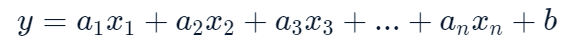

- untuk menggunakan model ini maka diperlukan nilai koefisien sebanyak jumlah fitur yang digunakannya
- serupa dengan teori yang ada, scikit bekerja serupa dengan teoritisnya dimana pada regresi linear berganda diharapkan terdapat satu variable masing-masing untuk fitur dan target

#### 2.4 Multiple Linear Regression

In [122]:
# import train_test_split and LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# membagi data train dan data test
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.3 , random_state = 42)

# membuat instance variable
reg_all = LinearRegression()

# melakukan fitting model
reg_all.fit(X_train, y_train)

# melakukan prediksi
y_pred = reg_all.predict(X_test)

#### 2.5  Metrics Evaluasi : R-Squared

Berbeda dengan klasifikasi yang menggunakan akurasi, pada regresi menggunakan R-Squared yang menghitung jumlah varians dalam variable target yang dijelaskan oleh prediktor. untuk besar nilainya memiliki range 0 sampai 1. Jika bernilai 1 artinya prediktor mampu dengan baik menjelaskan varians target dan semakin rendah semakin buruk.
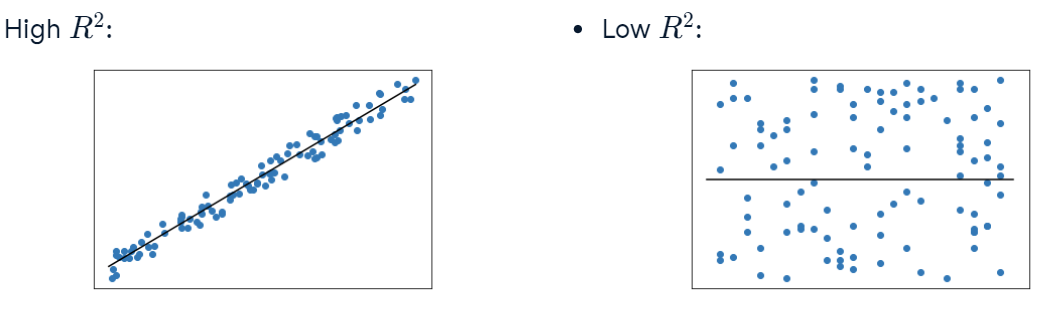

In [123]:
X = diabetes_df.drop ('glucose', axis = 1).values # prediktor
y = diabetes_df['glucose'].values # target

# import train_test_split and LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# membagi data train dan data test
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.3 , random_state = 42)

# membuat instance variable
reg_all = LinearRegression()

# melakukan fitting model
reg_all.fit(X_train, y_train)

# melakukan prediksi
y_pred = reg_all.predict(X_test)


In [124]:
reg_all.score(X_test,y_test)

0.28280468810375115

**insight:**
- dari nilai diatas diketahui bahwa fitur hanya menjelaskan 28% varians kadar glukosa darah

#### 2.6 Metrics Evaluation : MSE

Cara lain untuk menilai kinerja model yaitu dengan mengambil rata-rata dari jumlah sisa kuadrat
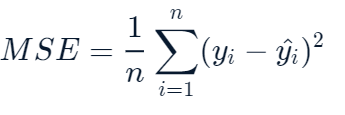

- MSE dihitung dengan satuan variable target
- misal model memprediksi nilai dollar, MSE akan dikuadratkan dalam dollar
- untuk mengkonversi ke dollar, kita dapat mengambil akar kuadrat mengguakan RMSE

#### 2.7 Metrics Evaluation : RMSE

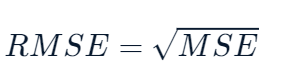

- Untuk menghitung RMSE gunakan sklearn

In [125]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False)

26.341459582232265

**insight:**
- model tersebut memiliki kesalahan rata-rata untuk kadar blood glucose sekitar 26 mg/dl

Perbedaan utama antara keduanya adalah RMSE memberikan gambaran yang lebih intuitif tentang sejauh mana model melenceng dalam prediksi dari data aktual, karena ia menggunakan akar kuadrat dari MSE. Dalam beberapa kasus, seperti prediksi harga, RMSE lebih mudah diinterpretasikan karena ia memiliki unit pengukuran yang sama dengan variabel yang diprediksi (misalnya, dolar). Namun, dalam beberapa situasi, seperti tugas regresi dengan outlier yang kuat, MSE mungkin lebih tahan terhadap pengaruh outlier daripada RMSE.

### Exercise

**1. Fit and predict for regression**

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows:

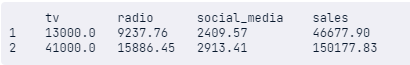

You will then use this model to predict sales based on the values of the test features.

LinearRegression and train_test_split have been preloaded for you from their respective modules.

- Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
- Instantiate a linear regression model.
- Fit the model to the training data.
- Create y_pred, making predictions for sales using the test features.

In [126]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [127]:
sales_df = sales_df.drop('influencer', axis = 1)

In [128]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


 > The first two predictions appear to be within around 5% of the actual values from the test set!

**2. Regression performance**

Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

- Import mean_squared_error.
- Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
- Calculate the model's root mean squared error using y_test and y_pred.
- Print r_squared and rmse.

In [129]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600101


> Wow, the features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!

## 3. Cross Validation

Salah satu cara untuk menguji kinerja model machine learning sudah kita pelajari dengan melakukan train-test-split (membagi data train dan data test). Namun pada kenyataannya ketika kita menguji performa model misal R-Squared ada kemungkinan hasil yang diperoleh sangat bervariasi disebabkan pada bagaimana kita melakukan pembagian data train dan data test. Untuk mengatasi hal tersebut Cross Validation menjadi metode tambahan yang berguna agar model memiliki kemampuan untuk belajar daengan baik terhadap data yang belum pernah dilihat data uji. 

Beberapa alasan kenapa Cross Validation digunakan :
- CV memberikan performa model yang lebih stabil karena melibatkan pengujian model pada beberapa subset data yang berbeda
- Train test Split umumnya memberikan kinerja model yang sangat baik pada fitting model, yang menjadikannya mudah overfit
- CV membantu mengurangi kemungkinan bias karena semua daya digunakan dalam pengujian dan pelatihan dalam iterasi yang berbeda


### 3.1 Basic cross validation

Untuk melakukan cross-validation, dapat dilakukan dengan tahapan sebagai berikut, 

1. kita bagi sebuah dataset menjadi 5 kelompok/fold
2. pada fold 1 sebagai data test dan fold berikutnya (2,3,4,5) sebagai data train
3. kemudian ketika fold 2 sebagai data test maka fold (1,3,4,5) akan menjadi train dst..
4. kemudian kita hitung ke lima metriks evaluasi R-squared tersebut
5. setelah itu kita dapat hitung statistika deskriptif (mean, median, selang interval)

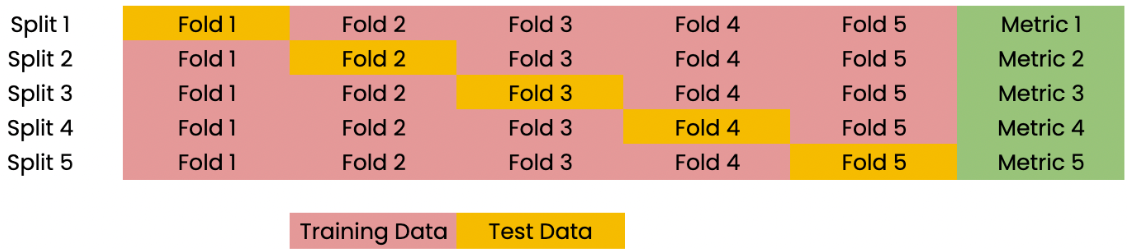

susunan diatas dikenal dengan nama 5 folds = 5-fold CV
- Hal yang perlu diperhatikan : semakin banyak nilai fold yang digunakan maka semakin mahal melakukan komputasi

### 3.2 CV in Scikit Learn

In [130]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [131]:
# import module
from sklearn.model_selection import cross_val_score, KFold


kf =  KFold(n_splits=6, shuffle= True, random_state=42) # deafult n_splits = 5

reg = LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=kf)

print(cv_results)

[0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]


In [132]:
print(np.mean(cv_results), np.std(cv_results))

0.9989911695584723 3.895599514495595e-05


In [133]:
print(np.quantile(cv_results,[0.025, 0.975]))

[0.99893558 0.99905335]


### Exercise

**1. Cross-validation for R-squared**

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.

- Import KFold and cross_val_score.
- Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
- Perform cross-validation using reg on X and y, passing kf to cv.
- Print the cv_scores.

In [135]:
# Create X and y arrays
X = sales_df[['radio','social_media' ]].values
y = sales_df["sales"].values


# k-fold cross validation in scikit learn
from sklearn.model_selection import cross_val_score, KFold

# mengatur seed 
kf = KFold(n_splits=6, shuffle= True, random_state= 42) # n_splits defultnya 5,
                                                        # shuffle akan mengacak data sebelum dipecah ke beberapa fold
    
# membuat instance model
reg = LinearRegression()


# memanggil cross_val_score
cv_results = cross_val_score(reg, X, y, cv = kf)

# lihat hasil
print(cv_results)

[0.75187559 0.76589813 0.75262628 0.76412429 0.72538175 0.76308008]


>Notice how R-squared for each fold ranged between 0.75 and 0.76? By using cross-validation, we can see how performance varies depending on how the data is split!

**2. Analyzing cross-validation metrics**

Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise.

numpy has been imported for you as np.

- Calculate and print the mean of the results.
- Calculate and print the standard deviation of cv_results.
- Display the 95% confidence interval for your results using np.quantile().

In [139]:
#evaluasi hasil cv
print(np.mean(cv_results), np.std(cv_results))

0.7538310201432022 0.013854887619993655


In [138]:
# menghitung nilai confident interval
print(np.quantile(cv_results, [0.025,0.975]))

[0.72869348 0.7656764 ]


> An average score of 0.75 with a low standard deviation is pretty good for a model out of the box! Now let's learn how to apply regularization to our regression models.

## 4. Regularized Regression

Regularisasi adalah sebuah teknik dalam regresi yang digunakan untuk menghindari overfitting. Regresi liniear tujuan utamanya adalah memperkecil loss function untuk memilih koefisien model (intercept) tiap kolom dan slope. Namun jika kita membiarkan koefisien ini sangat besar maka akan terjadi overfitting, oleh karena itu dilakukan  namanya regulerisasi yang akan memberikan pinalti pada koefisien yang besar.

Ada dua jenis regulerisasi yang paling umum,

### 4.1. Ridge Regression (L2)

- Ridge Regression adalah regularisasi yang menggunakan penalisasi berdasarkan kuadrat koefisien model. 
- Tujuan L2 adalah untuk mencegah koefisien menjadi sangat besar, sehingga mencegah overfitting, dan memberikan bobot yang lebih merata pada semua fitur. 
- L2 cenderung menghasilkan model yang lebih stabil dan menghindari overfitting.
- Rumus objektif dalam L2 regularization adalah: 
  - *Cost function + α * Σ(βi^2)*, di mana 
      - Cost function adalah cost function regresi biasa, 
      - α adalah hiperparameter yang mengendalikan kekuatan regulasi (memilih alpha sama seperti memilih k di KNN), dan 
          - ketika alpha = 0, kita akan melakukan OLS yang mana koefisien yang besar tidak akan dikenakan pilanti dan overfitting akan terjadi.
          - ketika alpha sangat tinggi maka akan cenderung terjadi undefitting
      - Σ(βi^2) adalah jumlah dari kuadrat semua koefisien (β) dalam model.

**Ridge in Scikit Learn**

In [140]:
# Create X and y arrays
X = diabetes_df.drop('glucose', axis = 1).values
y = diabetes_df['glucose'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [141]:
# ridge regression in scikit learn
# untuk mengetahui seberapa pengaruh alpha

from sklearn.linear_model import Ridge

scores = []

for alpha in [0.1, 1, 10, 100, 1000] :
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)


[0.28284666232222233, 0.28320633574804777, 0.2853000732200003, 0.26423984812668133, 0.19292424694100951]


**insight:**
- semakin besar nilai alpha maka semakin buruk kinerja model

### 4.2 Lasso Regression (L1)

- L1 regularization memasukkan penalitas berdasarkan nilai absolut dari koefisien model.
- Tujuan L1 adalah untuk mendorong beberapa koefisien model menjadi nol, sehingga menghasilkan seleksi fitur otomatis. Dengan kata lain, fitur yang tidak relevan dapat dieliminasi dari model.
- L1 cenderung menghasilkan model yang lebih "sparse," yang berarti hanya beberapa fitur yang memiliki bobot signifikan, sementara yang lainnya memiliki bobot nol.
- Rumus objektif (cost function) dalam L1 regularization adalah: 
    - *Cost function + α * Σ|βi|*, di mana 
        - Cost function adalah cost function regresi biasa, 
        - α adalah hiperparameter yang mengendalikan kekuatan regulasi, dan 
        - Σ|βi| adalah jumlah dari nilai absolut semua koefisien (β) dalam model.

In [142]:
# lasso mirip sekali dengan ridge, codenya hampir sama dengan sedikit perbedaan modul saja
from sklearn.linear_model import Lasso

scores = []

for alpha in [0.1, 1, 10, 100, 1000] :
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)


[0.2857532569482625, 0.29795609755827845, 0.17989838789273882, 0.10438614467572016, 0.04044144424693341]


**insight:**
- performa turun secara drastis ketika alpha melewati 20

#### 4.2.1 Lasso for Feature Selection

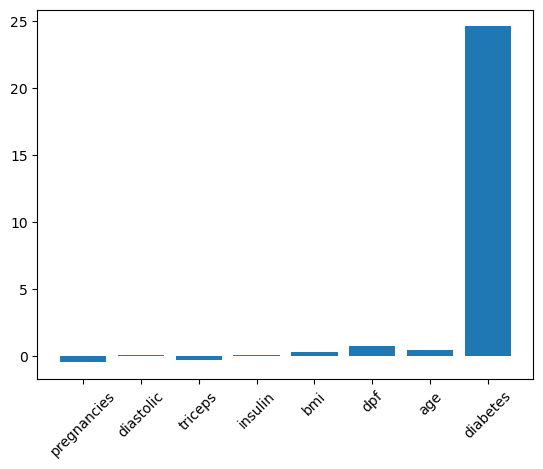

In [144]:
# lasso feature selections

X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values

names = diabetes_df.drop('glucose', axis = 1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

**insight:**
- dari grafik diatas prediktor terpenting adalah darah kadar glukosa

### 4.3 Perbedaan utama antara L1 dan L2 

- L1 dapat digunakan untuk seleksi fitur, sementara L2 biasanya tidak menghasilkan model yang selektif terhadap fitur.
- L1 menghasilkan koefisien yang jarang memiliki bobot besar, sedangkan L2 cenderung menghasilkan koefisien yang merata dalam magnitudo.
- Pemilihan antara L1 dan L2 tergantung pada karakteristik data dan asumsi yang sesuai dengan model Anda.

### Exercise

**1. Regularized regression: Ridge**
    
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their 
 scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.

- Import Ridge.
- Instantiate Ridge, setting alpha equal to alpha.
- Fit the model to the training data.
- Calculate the R2 score for each iteration of ridge.

In [145]:
# Create X and y arrays
X = sales_df.drop('sales', axis = 1 ).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [146]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


>Well done! The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

**2. Lasso regression for feature importance**

In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as X and y, along with sales_columns, which contains the dataset's feature names.

- Import Lasso from sklearn.linear_model.
- Instantiate a Lasso regressor with an alpha of 0.3.
- Fit the model to the data.
- Compute the model's coefficients, storing as lasso_coef.

In [147]:
sales_df = sales_df.drop('sales', axis = 1)

sales_columns = sales_df.columns
sales_columns

Index(['tv', 'radio', 'social_media'], dtype='object')

[ 3.56256962 -0.00397035  0.00496385]


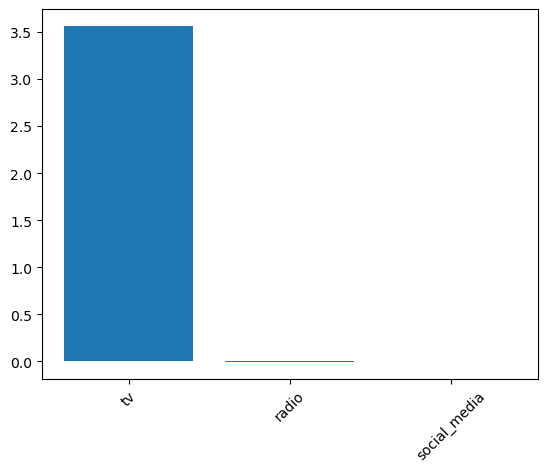

In [148]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

> See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values! In the next chapter, we will learn how to further assess and improve our model's performance!